In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array


In [2]:
dir="E:\\project for computer vision\\data augumentation"

In [3]:
datagen=ImageDataGenerator(
validation_split=0.2,
rescale=1./255)

In [4]:
training=datagen.flow_from_directory(
dir,
target_size=(256,256),
batch_size=50,
class_mode='categorical',
subset="training")

Found 656 images belonging to 4 classes.


In [5]:
testing=datagen.flow_from_directory(
dir,
target_size=(256,256),
batch_size=25,
class_mode='categorical',
subset="validation")

Found 162 images belonging to 4 classes.


In [6]:
model=Sequential()

In [7]:
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D((8, 8)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((4, 4)))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(218, activation="relu"))
model.add(Dense(4, activation="softmax"))  


C:\Users\jramy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
steps_per_epoch_training=training.samples//training.batch_size
steps_per_epoch_training

13

In [10]:
steps_per_epoch_validation=testing.samples//testing.batch_size
steps_per_epoch_validation

6

In [11]:
fit = model.fit(
    training,
    steps_per_epoch=steps_per_epoch_training,
    epochs=15,
    validation_data=testing,
    validation_steps=steps_per_epoch_validation
)

Epoch 1/15


C:\Users\jramy\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\Users\jramy\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.3469 - loss: 1.3444 - val_accuracy: 0.5867 - val_loss: 1.2768
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 1.4689 - val_accuracy: 0.6667 - val_loss: 1.2294
Epoch 3/15


C:\Users\jramy\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 939ms/step - accuracy: 0.4713 - loss: 1.2114 - val_accuracy: 0.5933 - val_loss: 1.0639
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4600 - loss: 1.1259 - val_accuracy: 0.5000 - val_loss: 1.1819
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 883ms/step - accuracy: 0.5199 - loss: 1.1160 - val_accuracy: 0.5667 - val_loss: 1.0292
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5200 - loss: 1.0633 - val_accuracy: 0.5833 - val_loss: 0.9271
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 961ms/step - accuracy: 0.5672 - loss: 0.9835 - val_accuracy: 0.6267 - val_loss: 0.9715
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8333 - loss: 0.4764 - val_accuracy: 0.6667 - val_loss: 0.7314
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 926ms/step - accuracy: 0.6275 - loss: 0.9343 - val_accuracy: 0.6333 - val_loss: 0.9600
Epoch 10/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8200 - loss: 0.6676 - val_accuracy: 0.7500 - val_los

In [12]:
print("Class indices:", training.class_indices)


Class indices: {'Cattle': 0, 'CompulsorySoundHorn': 1, 'Cross Road': 2, 'Cycle Crossing': 3}


In [13]:
labels = ["cattle", "compulsory sound horn", "cross road", "cycle crossing"]


In [14]:
def predicted_image(filename):
    img=load_img(filename,target_size=(256,256,3))
    plt.imshow(img)
    plt.show()
    
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255
    
    predicted_image=model.predict(img_array)
    predicted_probability=predicted_image[0,0]
    class_idx=np.argmax(predicted_image)
    
    if 0 <= class_idx < len(labels):
        print(labels[class_idx])

    
    

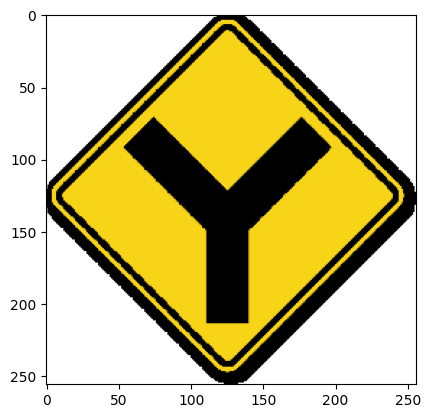

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
cross road


In [15]:
predicted_image("E:\\project for computer vision\\data augumentation\\Cross Road\\4Tb64aGGc.png")